In [2]:
import numpy as np
d =4
m =8
o =2
inputsample = np.random.randn(d,m)

print(inputsample.shape)
y = np.random.randint(0,2,m).reshape(1,-1)
y.shape

(4, 8)


(1, 8)

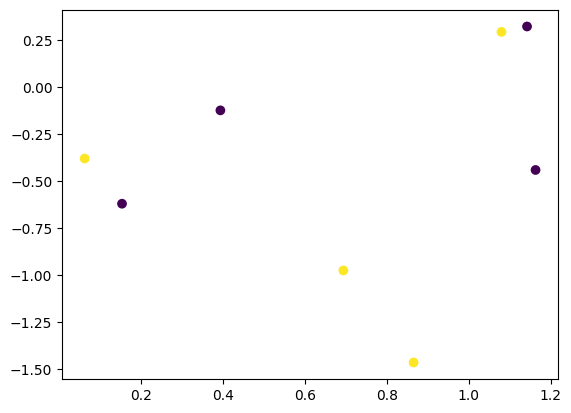

In [3]:
import matplotlib.pyplot as plt
plt.scatter(inputsample[0], inputsample[1], c=y[0])
plt.show()

In [4]:
len(np.unique(y))

2

In [5]:
def relu(x):
    return np.maximum(x,0)

def sigmoid(x):
    return (1 / (1 + np.exp(-x)) )

def derivative_relu(x):
    return np.array(x>0,dtype="float")

a = np.array([[1,2,-4],[1,0,-9]])    
derivative_relu(a)

array([[1., 1., 0.],
       [1., 0., 0.]])

In [6]:
def initialize_parameters(n_x,n_h1,n_h2,n_y):
    w1 = np.random.randn(n_h1,n_x) * 0.01
    b1 = np.zeros(n_h1).reshape(-1,1)

    w2 = np.random.randn(n_h2,n_h1) * 0.01
    b2 = np.zeros(n_h2).reshape(-1,1)

    w3 = np.random.randn(n_y,n_h2) * 0.01
    b3 = np.zeros(n_y).reshape(-1,1)
    return w1,b1,w2,b2,w3,b3

def forward_propogation(x,w1,b1,w2,b2,w3,b3):
    z1= np.matmul(w1,x) +b1 ##(200,4) (4,8) (200,8)
    a1= relu(z1) #(200,8)
    # print(z1.shape,a1.shape)
    z2= np.matmul(w2,a1) +b2 ##(20,20) (200,8) (20,8)
    a2= relu(z2) #(20,8)

    z3= np.matmul(w3,a2) +b3 ##(1,20) (20,8) (1,8)
    a3= sigmoid(z3) #(1,8)

    return z1,a1,z2,a2,z3,a3    

def back_propogation(x,y,z1,a1,z2,a2,z3,a3,w1,b1,w2,b2,w3,b3):
    dz3 = a3-y #(1,8) (1,8) - (1,8)
    dw3 = (1/m) * np.matmul(dz3,a2.T) #(1,8) (8,1) (1,1)
    db3 = (1/m) * dz3.sum(axis=1,keepdims=True)

    dz2 = np.matmul(w3.T,dz3) * derivative_relu(a2) #(1,20)T=>(20,1),(1,8)- (20,8),(20,8)
    dw2 = (1/m) * np.matmul(dz2,a1.T) #(1,8) (8,1) (1,1)
    db2 = (1/m) * dz2.sum(axis=1,keepdims=True)    

    dz1 = np.matmul(w2.T,dz2) * derivative_relu(a1) #(1,20)T=>(20,1),(1,8)- (20,8),(20,8)
    dw1 = (1/m) * np.matmul(dz1,x.T) #(1,8) (8,1) (1,1)
    db1 = (1/m) * dz1.sum(axis=1,keepdims=True) 

    return dw1,dw2,dw3,db1,db2,db3

def forward_propogation_with_dropout(x,w1,b1,w2,b2,w3,b3,keep_rate):
    z1= np.matmul(w1,x) +b1 ##(200,4) (4,8) (200,8)
    a1= relu(z1) #(200,8)
    #dropout
    d1 = np.random.randn(a1.shape[0],a1.shape[1])
    d1 = d1 < keep_rate
    a1 = a1*d1
    a1 = a1/keep_rate
    
    z2= np.matmul(w2,a1) +b2 ##(20,20) (200,8) (20,8)
    a2= relu(z2) #(20,8)
    #droupout
    d2 = d2 < keep_rate
    a2 = a2*d2
    a2 = a2/keep_rate
    
    z3= np.matmul(w3,a2) +b3 ##(1,20) (20,8) (1,8)
    a3= sigmoid(z3) #(1,8)

    return z1,a1,z2,a2,z3,a3,d1,d2    

def back_propogation_with_droupout(x,y,z1,a1,z2,a2,z3,a3,w1,b1,w2,b2,w3,b3,d1,d2,keep_rate):
    dz3 = a3-y #(1,8) (1,8) - (1,8)
    dw3 = (1/m) * np.matmul(dz3,a2.T) #(1,8) (8,1) (1,1)
    db3 = (1/m) * dz3.sum(axis=1,keepdims=True)
    da2 = np.matmul(w3.T,dz3)
    
    da2 = da2 * d2
    da2 = da2/keep_rate
    
    dz2 = da2 * derivative_relu(a2) #(1,20)T=>(20,1),(1,8)- (20,8),(20,8)
    dw2 = (1/m) * np.matmul(dz2,a1.T) #(1,8) (8,1) (1,1)
    db2 = (1/m) * dz2.sum(axis=1,keepdims=True)    

    da1 = np.matmul(w2.T,dz2)
    da1 = da1*d1
    da1 = da1/keep_rate
    dz1 = da1 * derivative_relu(a1) #(1,20)T=>(20,1),(1,8)- (20,8),(20,8)
    dw1 = (1/m) * np.matmul(dz1,x.T) #(1,8) (8,1) (1,1)
    db1 = (1/m) * dz1.sum(axis=1,keepdims=True) 

    return dw1,dw2,dw3,db1,db2,db3
    
def update_weights(dw1,dw2,dw3,db1,db2,db3 , w1,b1,w2,b2,w3,b3,learning_rate):
    w1 = w1 - (learning_rate *dw1)
    w2 = w2 - (learning_rate *dw2)
    w3 = w3 - (learning_rate *dw3)
    
    b1 = b1 - (learning_rate *db1)
    b2 = b2 - (learning_rate *db2)
    b3 = b3 - (learning_rate *db3)

    return w1,b1,w2,b2,w3,b3

In [7]:
learning_rate=0.01
def model(x,y,itr,n_h1,n_h2):
    m = x.shape[-1]
    n_x=x.shape[0]
    n_y=1
    w1,b1,w2,b2,w3,b3 =initialize_parameters(n_x,n_h1,n_h2,n_y)

    for i in range(100):
        z1,a1,z2,a2,z3,a3 = forward_propogation(x,w1,b1,w2,b2,w3,b3)
        
        dw1,dw2,dw3,db1,db2,db3 =back_propogation(x,y,z1,a1,z2,a2,z3,a3,w1,b1,w2,b2,w3,b3)

        w1,b1,w2,b2,w3,b3 =update_weights(dw1,dw2,dw3,db1,db2,db3 , w1,b1,w2,b2,w3,b3,learning_rate)
        

    
model(inputsample,y,itr =200,n_h1=200,n_h2=20)    
    